In [3]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statistics
import seaborn as sns

# set up the figure size
%matplotlib inline

In [4]:
# Set up the data

filename = 'Fraud_Data - Fraud_Data.csv'
def setdata(filename):
    df = pd.read_csv(filename)
    # Strip and make column names lowercase so that they are easy to manage. 
    df.columns = df.columns.str.strip().str.lower()
    # Replace characters or remove spaces and make all words lowercase.
    df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')
    return df

df = setdata(filename)
#Be aware, the file is big so this process will take some time.

In [6]:
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 3:03:34,2015-03-29 0:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 7:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 9:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [8]:
df.shape

(151112, 11)

In [12]:
# check types
df.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
is_fraud            int64
dtype: object

The following dataset contains the following fields that describe the online transaction:

user_id: unique id of user
signup_time: time that the user created account
purchase_time: time of the transaction
purchase_value: amount of the transaction
device_id: device that user conducted transaction on
source: attribution channel for the transaction
browser: browser that user conducted transaction on
sex: gender of the user
age: age of the user
ip_address: IP address of the purchase
is_fraud: if the transaction is flagged as fraudulent

Can you describe the major differences between the non-fraud vs fraud transactions?

More specifically, can you create histograms for purchase value, time between sign up and purchase time, and age -- with fraud/non-fraud differentiated on the same chart?

In [18]:
df['is_fraud'].value_counts()

0    136961
1     14151
Name: is_fraud, dtype: int64

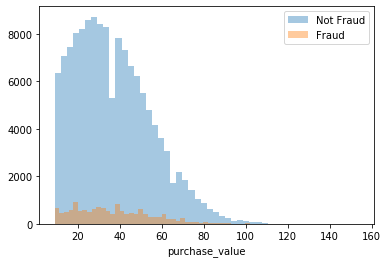

In [65]:
# historgram of purchase value by status
x = df['purchase_value'][df.is_fraud == 0]
y = df['purchase_value'][df.is_fraud == 1]

plot1 = sns.distplot(x, kde = False, label = "Not Fraud")
plot2 = sns.distplot(y, kde = False, label = "Fraud")
plt.legend()
plt.show()

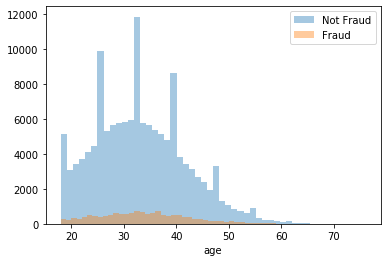

In [64]:
# historgram of purchase value by status
x = df['age'][df.is_fraud == 0]
y = df['age'][df.is_fraud == 1]

plot1 = sns.distplot(x, kde = False, label = "Not Fraud")
plot2 = sns.distplot(y, kde = False, label = "Fraud")
plt.legend()
plt.show()

In [26]:
# Create date_time column from 'signup_time', 'purchase_time' columns
df['s_time'] = pd.to_datetime(df.signup_time, format="%Y-%m-%d %H:%M:%S")
df['p_time'] = pd.to_datetime(df.purchase_time, format="%Y-%m-%d %H:%M:%S")

In [35]:
df['time_diff'] = (df.p_time-df.s_time)

In [58]:
df['timediffhrs'] = df.time_diff.apply(lambda x: x / pd.Timedelta('1 hour'))
#df['timediffhrs'] = df.time_diff.dt.days

In [59]:
df.timediffhrs

0         1251.856111
1            4.984444
2            0.000278
3          136.690278
4         1211.516944
             ...     
151107    1461.453611
151108     258.686111
151109    1856.004444
151110    1429.477500
151111     979.025833
Name: timediffhrs, Length: 151112, dtype: float64

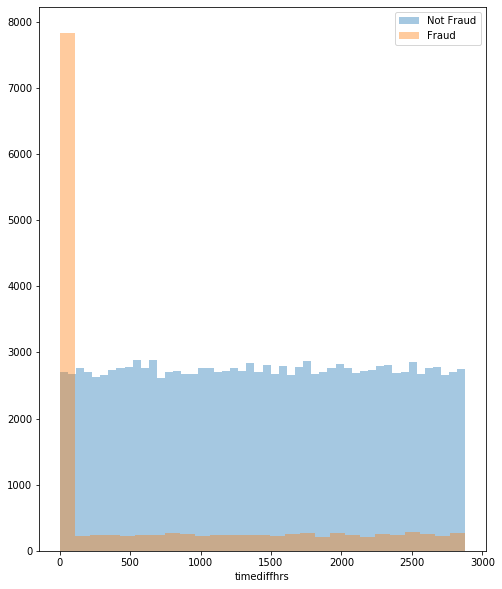

In [63]:
plt.figure(figsize = (8,10))
# historgram of purchase value by status
x = df['timediffhrs'][df.is_fraud == 0]
y = df['timediffhrs'][df.is_fraud == 1]

plot1 = sns.distplot(x, kde = False, label = "Not Fraud")
plot2 = sns.distplot(y, kde = False, label = "Fraud")
plt.legend()
plt.show()